In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_sanction_train.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Cleaning

In [4]:
df.shape

(614, 13)

In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df = df[df['Gender'].notna()]
df = df[df['Married'].notna()]

In [7]:
df['Dependents'].fillna('0', inplace=True)
df['Self_Employed'].fillna('No', inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(0, inplace=True) 
df['Credit_History'].fillna(0.0, inplace=True)

In [8]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
df.shape

(598, 13)

In [10]:
df.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

In [11]:
df.replace(to_replace='3+',value=3,inplace=True)

In [12]:
df.Dependents.unique()

array(['0', '1', '2', 3], dtype=object)

In [13]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
df.drop(columns='Loan_ID',inplace=True)

In [15]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [16]:
df.Credit_History = df.Credit_History.astype(int)

In [17]:
df.Dependents = df.Dependents.astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    object 
 1   Married            598 non-null    object 
 2   Dependents         598 non-null    int64  
 3   Education          598 non-null    object 
 4   Self_Employed      598 non-null    object 
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         598 non-null    float64
 8   Loan_Amount_Term   598 non-null    float64
 9   Credit_History     598 non-null    int64  
 10  Property_Area      598 non-null    object 
 11  Loan_Status        598 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 60.7+ KB


# EDA

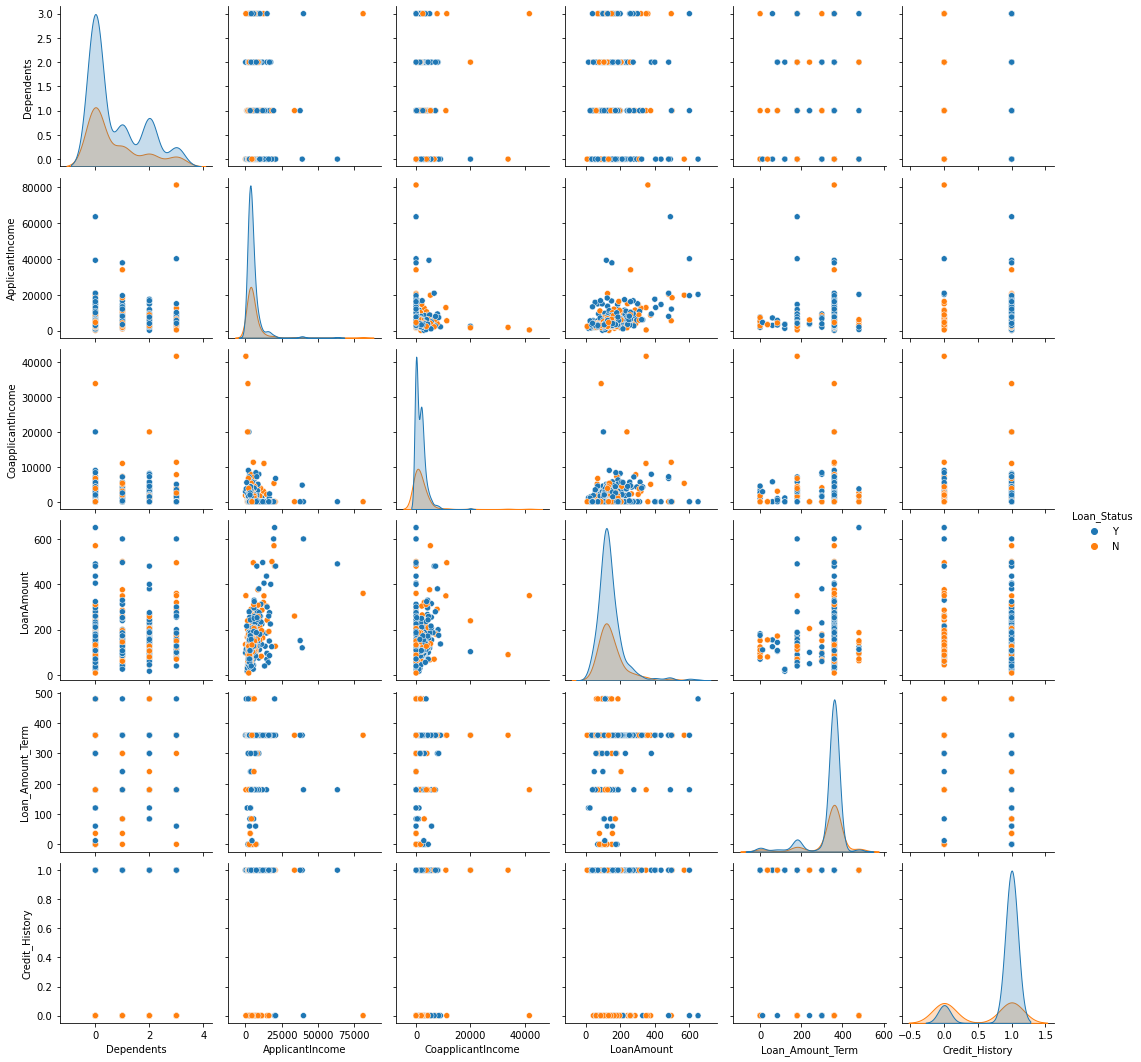

In [19]:
sns.pairplot(df,hue='Loan_Status')

# Preprocess

In [20]:
gender_num = pd.get_dummies(df,columns=['Gender','Married','Self_Employed','Property_Area','Loan_Status'],drop_first=True)

In [21]:
gender_num.replace({'Graduate' : 1,'Not Graduate' : 0},inplace = True)

In [22]:
gender_num

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,1,5849,0.0,127.0,360.0,1,1,0,0,0,1,1
1,1,1,4583,1508.0,128.0,360.0,1,1,1,0,0,0,0
2,0,1,3000,0.0,66.0,360.0,1,1,1,1,0,1,1
3,0,0,2583,2358.0,120.0,360.0,1,1,1,0,0,1,1
4,0,1,6000,0.0,141.0,360.0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,2900,0.0,71.0,360.0,1,0,0,0,0,0,1
610,3,1,4106,0.0,40.0,180.0,1,1,1,0,0,0,1
611,1,1,8072,240.0,253.0,360.0,1,1,1,0,0,1,1
612,2,1,7583,0.0,187.0,360.0,1,1,1,0,0,1,1


In [23]:
gender_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               598 non-null    int64  
 1   Education                598 non-null    int64  
 2   ApplicantIncome          598 non-null    int64  
 3   CoapplicantIncome        598 non-null    float64
 4   LoanAmount               598 non-null    float64
 5   Loan_Amount_Term         598 non-null    float64
 6   Credit_History           598 non-null    int64  
 7   Gender_Male              598 non-null    uint8  
 8   Married_Yes              598 non-null    uint8  
 9   Self_Employed_Yes        598 non-null    uint8  
 10  Property_Area_Semiurban  598 non-null    uint8  
 11  Property_Area_Urban      598 non-null    uint8  
 12  Loan_Status_Y            598 non-null    uint8  
dtypes: float64(3), int64(4), uint8(6)
memory usage: 40.9 KB


In [24]:
y = gender_num['Loan_Status_Y']

In [25]:
x = gender_num.drop(columns='Loan_Status_Y')

In [26]:
x

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,1,5849,0.0,127.0,360.0,1,1,0,0,0,1
1,1,1,4583,1508.0,128.0,360.0,1,1,1,0,0,0
2,0,1,3000,0.0,66.0,360.0,1,1,1,1,0,1
3,0,0,2583,2358.0,120.0,360.0,1,1,1,0,0,1
4,0,1,6000,0.0,141.0,360.0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,2900,0.0,71.0,360.0,1,0,0,0,0,0
610,3,1,4106,0.0,40.0,180.0,1,1,1,0,0,0
611,1,1,8072,240.0,253.0,360.0,1,1,1,0,0,1
612,2,1,7583,0.0,187.0,360.0,1,1,1,0,0,1


In [27]:
x.shape

(598, 12)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

# Model fitting

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression()

In [32]:
model.fit(x_train,y_train)

LogisticRegression()

In [33]:
y_pred = model.predict(x_test)

In [34]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
cm = confusion_matrix(y_test,y_pred)

In [37]:
cm

array([[ 9,  5],
       [ 3, 43]])

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,y_pred)

0.8666666666666667

# Without reduce variable

In [40]:
gender_num_all = pd.get_dummies(df,columns=['Gender','Married','Self_Employed','Property_Area'])

In [41]:
gender_num_all.replace({'Graduate' : 1,'Not Graduate' : 0},inplace = True)
gender_num_all.replace({'N':0,'Y':1},inplace=True)

In [42]:
y_all = gender_num_all['Loan_Status']

In [43]:
x_all = gender_num_all.drop(columns='Loan_Status')

In [44]:
x_all.shape

(598, 16)

In [45]:
x_train_all,x_test_all,y_train_all,y_test_all = train_test_split(x_all,y_all,test_size=.1)

In [46]:
model.fit(x_train_all,y_train_all)

/home/smit/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
y_pred_all = model.predict(x_test_all)

In [48]:
accuracy_score(y_test_all,y_pred_all)

0.7166666666666667

In [49]:
model.predict(x_test_all)

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [50]:
cm_all = confusion_matrix(y_test_all,y_pred_all)

In [51]:
cm_all

array([[ 9, 16],
       [ 1, 34]])